In [555]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import face_recognition

In [556]:
data=pd.DataFrame(columns=['Pictures','histogram','label'],index=)

In [557]:
def LBP(a):
    print(a.shape)
    m=a.shape[0]
    n=a.shape[1]
    lbp=np.array([[0 for i in range(n-2)] for j in range(m-2)])
    for i in range(m-2):
        for j in range(n-2):
            pat=''
            ther=a[i+1][j+1]
            if ther>a[i][j]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+2][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            lbp[i][j]=int(pat,2)
    return lbp

In [558]:
def HOG(img):
    grid_x,grid_y=9,9
    print(img.shape)
    m=img.shape[0]//grid_x
    n=img.shape[1]//grid_y
    hist=[]
    for i in range(grid_x-1):
        for j in range(grid_y-1):
            temp=img[j*m:(j+1)*m,i*n:(i+1)*n]
            x=np.reshape(temp,[1,m*n])
            #plt.hist(x[0],bins=256)
            hist1, bin_edges = np.histogram(x,bins=256)
            hist.append(hist1)
    hist=np.array(hist)
    return hist

In [725]:
imgpath = 'Images\sample27.jpg'

In [726]:
img = cv2.imread(imgpath)

In [727]:
img=cv2.resize(img,(1600,2200))

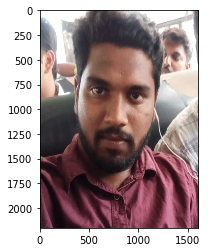

In [728]:
plt.imshow(img[:,:,::-1])
plt.show()

In [729]:
print("enter label : ")
lab=imgpath[6:14]
lab='Y16CS896'
print(lab)

enter label : 
Y16CS896


In [730]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [731]:
faces = face_recognition.face_locations(img1)

In [732]:
faces

[(617, 1256, 1576, 298)]

(2200, 1600)
(2198, 1598)


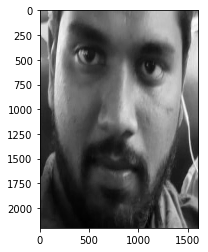

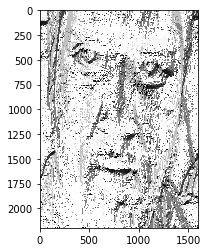

In [733]:
for top,right,bottom,left in faces:
    crop_img = img1[top:bottom, left:right]
    crop_img=cv2.resize(crop_img,(1600,2200))
    lbp_img = LBP(crop_img)
    histogram=HOG(lbp_img)
    df1=pd.DataFrame({'Pictures':[lbp_img],'histogram':[histogram],'label':[lab]})
    data=data.append(df1)
    plt.imshow(crop_img,cmap='gray')
    plt.show()
    plt.imshow(lbp_img,cmap='gray')
    plt.show()

In [799]:
data.index = range(1,len(data)+1)

In [800]:
data

,Pictures,histogram,label
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[46, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0, 0, 0, 0, ...",Y16CS868
2,"[[247, 193, 247, 247, 247, 227, 247, 227, 247,...","[[204, 0, 0, 0, 0, 0, 0, 0, 1347, 0, 0, 0, 0, ...",Y16CS863
3,"[[255, 255, 127, 193, 193, 193, 255, 255, 255,...","[[547, 0, 0, 0, 0, 0, 0, 0, 276, 0, 0, 0, 0, 0...",Y16CS863
4,"[[255, 255, 127, 127, 255, 8, 201, 221, 156, 6...","[[1068, 0, 0, 0, 0, 0, 0, 0, 1908, 0, 0, 0, 0,...",Y16CS863
5,"[[255, 255, 255, 247, 247, 247, 247, 247, 247,...","[[90, 0, 0, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 0, ...",Y16CS868
6,"[[255, 255, 127, 127, 255, 8, 201, 221, 156, 6...","[[1068, 0, 0, 0, 0, 0, 0, 0, 1908, 0, 0, 0, 0,...",Y16CS863
7,"[[255, 255, 255, 127, 255, 255, 255, 255, 255,...","[[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...",Y16CS919
8,"[[255, 127, 255, 65, 201, 201, 255, 127, 127, ...","[[794, 0, 0, 0, 0, 0, 0, 0, 1098, 0, 0, 0, 0, ...",Y16CS919
9,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[488, 0, 0, 0, 0, 0, 0, 0, 1027, 0, 0, 0, 0, ...",Y16CS919
10,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[73, 0, 0, 0, 0, 0, 0, 0, 203, 0, 0, 0, 0, 0,...",Y16CS919


# Recognition Image

In [755]:
imgpath = 'Images\sample17.jpg'

In [756]:
rec_img = cv2.imread(imgpath)

In [760]:
gray_img=cv2.resize(rec_img,(1600,2200))

In [761]:
gray_img = cv2.cvtColor(gray_img,cv2.COLOR_BGR2GRAY)

In [762]:
faces = face_recognition.face_locations(gray_img)
print(faces)

[(1020, 1167, 1686, 502), (558, 349, 825, 82)]


(2200, 1600)
(2198, 1598)


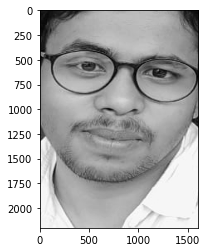

Y16CS868 1315122
Y16CS863 1789466
Y16CS863 1887640
Y16CS863 1715922
Y16CS868 1772294
Y16CS863 1715922
Y16CS919 1644692
Y16CS919 1934914
Y16CS919 1766136
Y16CS919 1585800
Y16CS863 1237100
Y16CS896 1472112
Y16CS896 1747772
Y16CS896 1439592
Y16CS896 1585654
Y16CS863
(2200, 1600)
(2198, 1598)


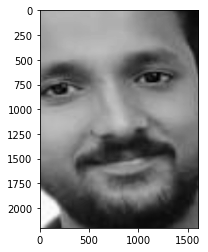

Y16CS868 1655958
Y16CS863 1796316
Y16CS863 2569970
Y16CS863 2278162
Y16CS868 1847802
Y16CS863 2278162
Y16CS919 1199810
Y16CS919 2579448
Y16CS919 1846628
Y16CS919 1448060
Y16CS863 1524064
Y16CS896 1694508
Y16CS896 1902524
Y16CS896 1942096
Y16CS896 1845132
Y16CS919


In [829]:
for top,right,bottom,left in faces:
    crop_img = gray_img[top:bottom, left:right]
    crop_img=cv2.resize(crop_img,(1600,2200))
    lbp_img = LBP(crop_img)
    histogram=HOG(lbp_img)
    hist=np.array(data['histogram'])
    labels=np.array(data['label'])
    plt.imshow(crop_img,cmap='gray')
    plt.show()
    min1=9999999999999
    k=0
    for his in hist:
        dist=0
        for i,j in zip(histogram,his):
            for m,n in zip(i,j):
                dist+=abs(m-n)
        if min1>=dist:
            min1=dist
            label=labels[k]
        print(labels[k],dist)
        k+=1
    print(label)


In [831]:
data.to_json('sample.json')

In [832]:
df=pd.read_json('sample.json')

In [833]:
df

,Pictures,histogram,label
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[46, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0, 0, 0, 0, ...",Y16CS868
10,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[73, 0, 0, 0, 0, 0, 0, 0, 203, 0, 0, 0, 0, 0,...",Y16CS919
11,"[[255, 255, 221, 128, 255, 255, 255, 255, 193,...","[[69, 0, 0, 0, 0, 0, 0, 0, 107, 0, 0, 0, 0, 0,...",Y16CS863
12,"[[255, 193, 255, 193, 255, 193, 255, 193, 255,...","[[31, 0, 0, 0, 0, 0, 0, 0, 68, 0, 0, 0, 0, 0, ...",Y16CS896
13,"[[255, 255, 255, 255, 255, 255, 127, 255, 255,...","[[178, 0, 0, 0, 0, 0, 0, 0, 176, 0, 0, 0, 0, 0...",Y16CS896
14,"[[255, 255, 255, 255, 255, 255, 255, 193, 255,...","[[68, 0, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0, 0, ...",Y16CS896
15,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[120, 0, 0, 0, 0, 0, 0, 0, 150, 0, 0, 0, 0, 0...",Y16CS896
2,"[[247, 193, 247, 247, 247, 227, 247, 227, 247,...","[[204, 0, 0, 0, 0, 0, 0, 0, 1347, 0, 0, 0, 0, ...",Y16CS863
3,"[[255, 255, 127, 193, 193, 193, 255, 255, 255,...","[[547, 0, 0, 0, 0, 0, 0, 0, 276, 0, 0, 0, 0, 0...",Y16CS863
4,"[[255, 255, 127, 127, 255, 8, 201, 221, 156, 6...","[[1068, 0, 0, 0, 0, 0, 0, 0, 1908, 0, 0, 0, 0,...",Y16CS863


In [ ]:
x=